In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv('Company_Data.csv')

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 

company['Urban']= label_encoder.fit_transform(company['Urban']) 

company['US']= label_encoder.fit_transform(company['US']) 



In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [11]:
company['ShelveLoc'].unique()

array([0, 1, 2])

In [27]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [30]:
sales_mean=company.Sales.mean()

In [31]:
sales_mean

7.496325

In [32]:
company['Sales'] = company.Sales.map(lambda X : 1 if X > 8 else 0)

In [33]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [35]:
# Splitting the data into x and y as input and output

X = company.iloc[:,1:]
Y = company['Sales']

In [36]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [37]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [38]:
company['Sales'].unique()

array([1, 0], dtype=int64)

In [41]:
company.Sales.value_counts()

0    236
1    164
Name: Sales, dtype: int64

In [42]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# Building Decision Tree on The Basis of Entropy Criteria

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 92.5\nentropy = 0.969\nsamples = 320\nvalue = [193, 127]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.696\nsamples = 48\nvalue = [9, 39]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 57.0\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 198.5\nentropy = 0.422\nsamples = 35\nvalue = [3, 32]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.908\nsamples = 272\nvalue = [184, 88]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 102.5\nentropy = 0.27\nsamples = 65\nvalue = [62, 3]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.127\nsamples = 57\

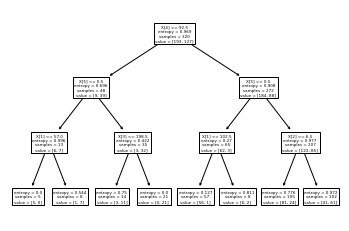

In [45]:
tree.plot_tree(model)

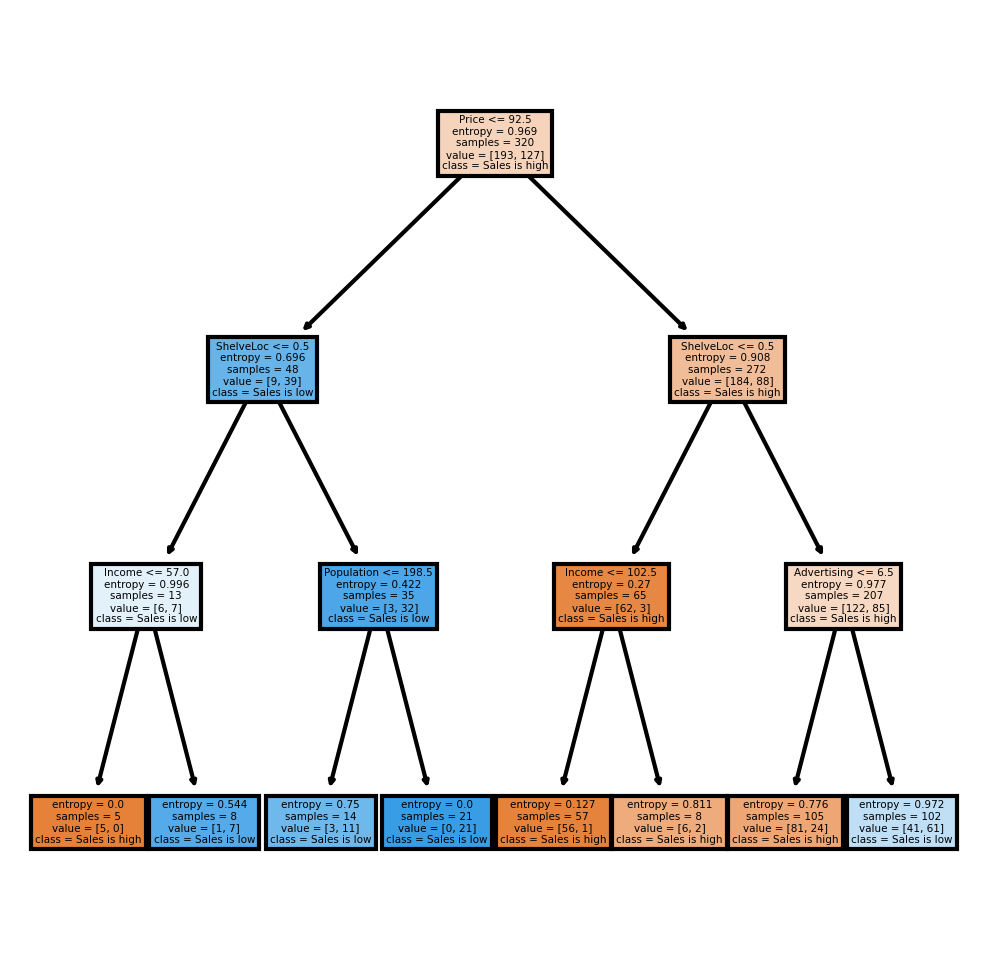

In [46]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [47]:
# Predicting the builded model on our x-test data

preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [48]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,1
Sales,,
0,33,10
1,12,25


In [49]:
# Accuracy 
np.mean(preds==y_test)

0.725

### Building Decision Tree Classifier (CART) using Gini Criteria

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [51]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
#Prediction and computing the accuracy
pred=model.predict(x_test)

In [53]:
np.mean(pred==y_test)

0.725

In [54]:
crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,1
Sales,,
0,33,10
1,12,25


In [55]:
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64